In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import geopandas as gpd
import folium

In [2]:
# Read the data from the CSV file
life_expectancy = pd.read_csv('LifeExpectancy.csv ')

In [3]:
# Display the first few rows of the dataframe
print(life_expectancy.head())

       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0              263   
1  Afghanistan  2014  Developing             59.9              271   
2  Afghanistan  2013  Developing             59.9              268   
3  Afghanistan  2012  Developing             59.5              272   
4  Afghanistan  2011  Developing             59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0     

In [4]:
# Summary statistics of the dataframe
print(life_expectancy.describe())

             Year  Life expectancy  Adult Mortality  infant deaths  \
count  2928.00000      2928.000000      2928.000000    2928.000000   
mean   2007.50000        69.224932       164.796448      30.407445   
std       4.61056         9.523867       124.292079     118.114450   
min    2000.00000        36.300000         1.000000       0.000000   
25%    2003.75000        63.100000        74.000000       0.000000   
50%    2007.50000        72.100000       144.000000       3.000000   
75%    2011.25000        75.700000       228.000000      22.000000   
max    2015.00000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2735.000000             2928.000000  2375.000000    2928.000000   
mean      4.614856              740.321185    80.960842    2427.855874   
std       4.050749             1990.930605    25.018337   11485.970937   
min       0.010000                0.000000     1.000000       0.000000   

In [5]:
print(life_expectancy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   int64  
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [6]:
# Check for missing values
print(life_expectancy.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64


In [7]:
# Data Cleaning: Handling missing values
imputer = SimpleImputer(strategy='mean')
life_expectancy_imputed = pd.DataFrame(imputer.fit_transform(life_expectancy.select_dtypes(include=[np.number])))
life_expectancy_imputed.columns = life_expectancy.select_dtypes(include=[np.number]).columns


In [8]:
# Data Normalization
scaler = StandardScaler()
life_expectancy_scaled = pd.DataFrame(scaler.fit_transform(life_expectancy_imputed), columns=life_expectancy_imputed.columns)

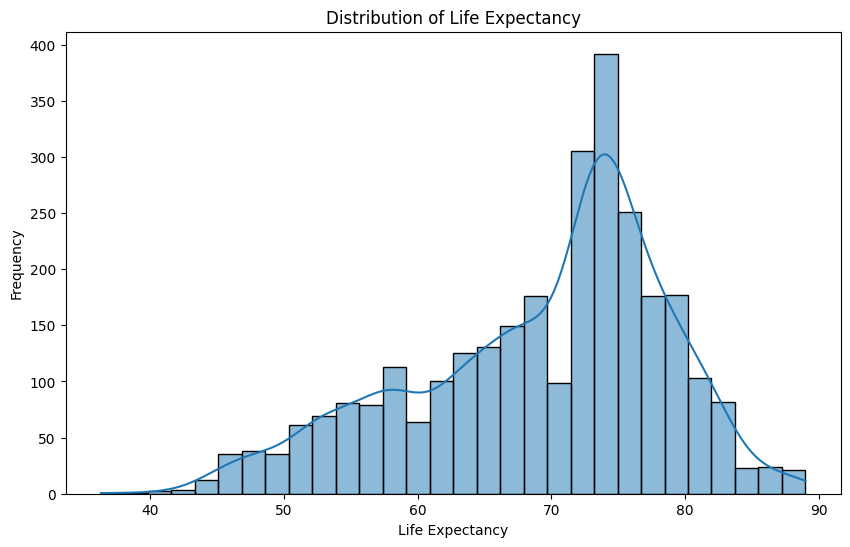

In [9]:
# Distribution of life expectancy
plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy['Life expectancy'], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

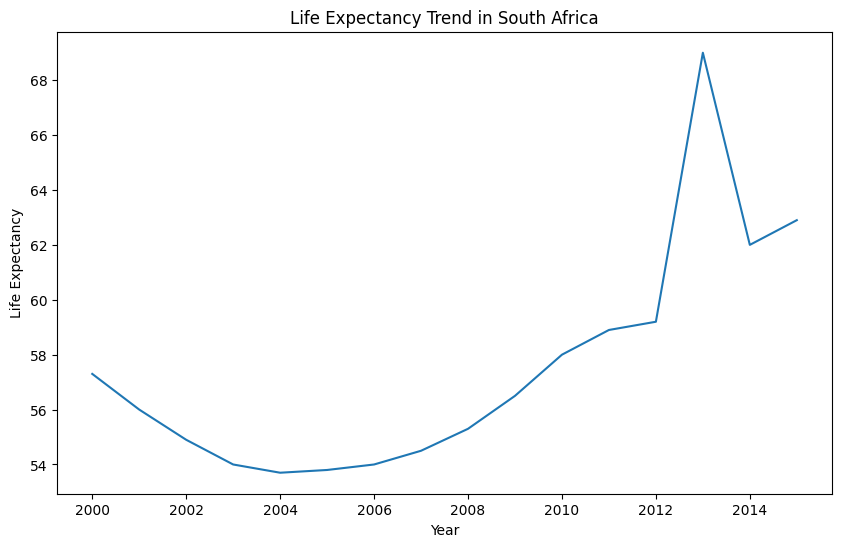

In [10]:
# life expectancy trend over time for a specific country
country_data = life_expectancy[life_expectancy['Country'] == 'South Africa']

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life expectancy', data=country_data)

# Adding titles and labels
plt.title('Life Expectancy Trend in South Africa')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

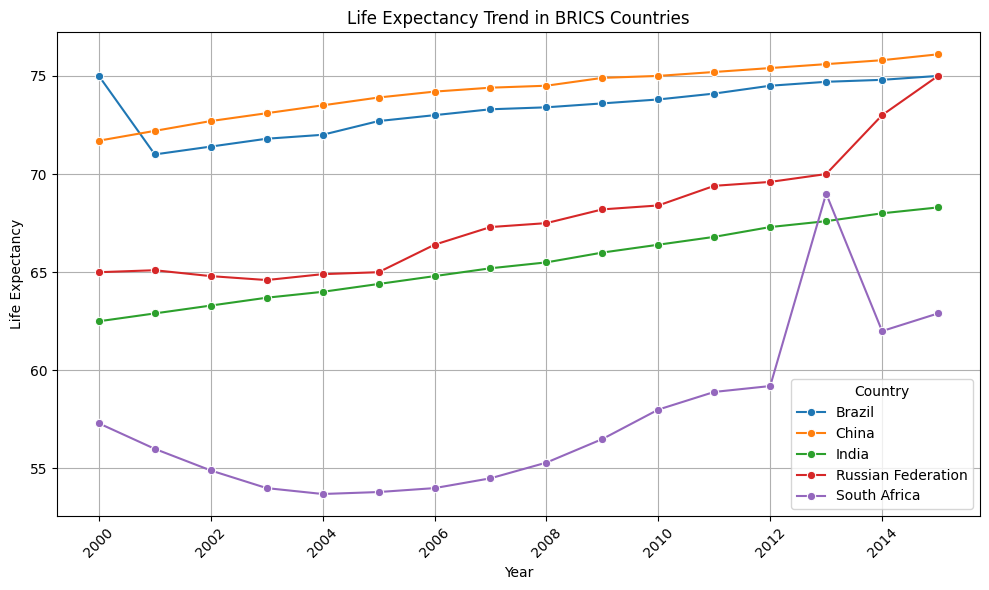

In [11]:
# life expectancy trend over time for BRICS countries
countries = ['South Africa', 'China', 'Brazil', 'Russian Federation', 'India']
country_data = life_expectancy[life_expectancy['Country'].isin(countries)]

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life expectancy', hue='Country', data=country_data, marker='o')

# Adding titles and labels
plt.title('Life Expectancy Trend in BRICS Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Country')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

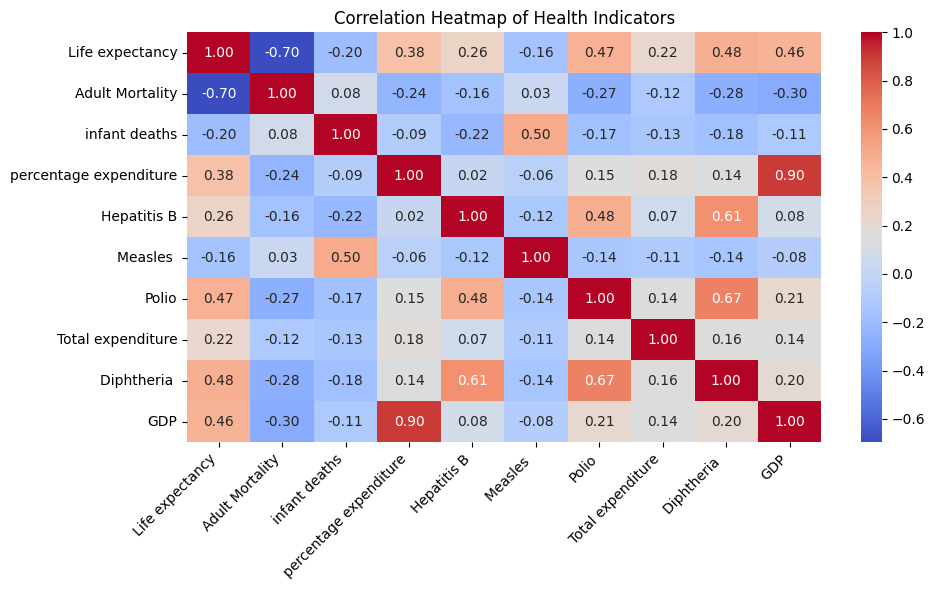

In [12]:
# Correlation Heatmap
selected_columns = life_expectancy[['Life expectancy', 'Adult Mortality', 'infant deaths', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP']]
correlation_matrix = selected_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Health Indicators')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# Geospatial Analysis: Visualizing life expectancy on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
life_expectancy_latest = life_expectancy.loc[life_expectancy.groupby('Country')['Year'].idxmax()]

world = world.merge(life_expectancy_latest, left_on='name', right_on='Country', how='left')
world = world.dropna(subset=['Life expectancy'])

m = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data=world,
    name='choropleth',
    data=world,
    columns=['Country', 'Life expectancy'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Life Expectancy'
).add_to(m)

m

C:\Users\Dell\AppData\Local\Temp\ipykernel_9408\942710017.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [14]:
# Predictive Modeling: Predicting Life Expectancy
features = ['Adult Mortality', 'infant deaths', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP']
X = life_expectancy[features]
y = life_expectancy['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 5.124816900712929
R^2 Score: 0.9407531524715629


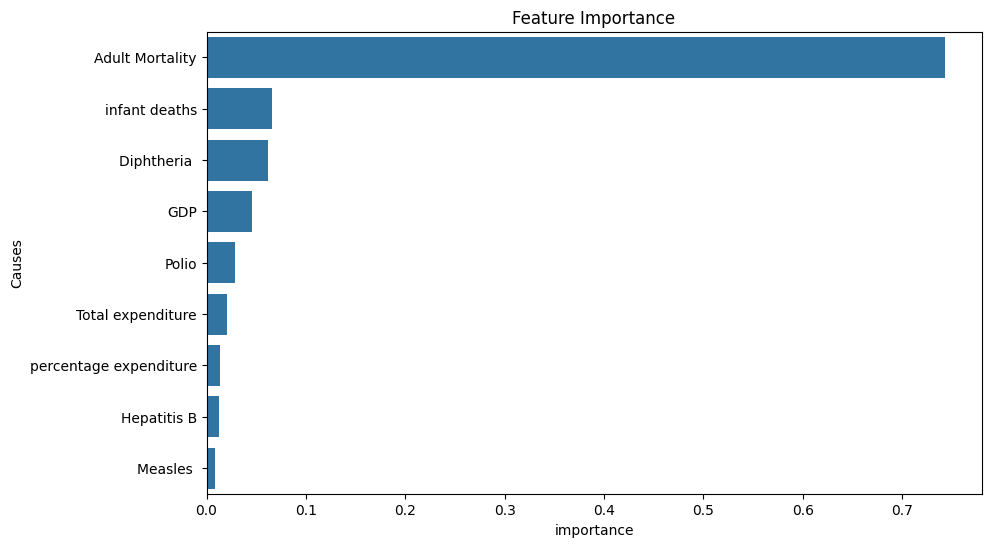

In [15]:
# Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=features, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.ylabel('Causes')
plt.show()